In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [19]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.026) 

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 600, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.40%
# Neural layers: 64, 32, 1
# Learning rate: 0.026
# Epochs: 600
# Batch size; 50


Epoch 1/600
244/244 - 0s - loss: 298325.1250 - mean_absolute_percentage_error: 32.0638
Epoch 2/600
244/244 - 0s - loss: 221910.1719 - mean_absolute_percentage_error: 22.9489
Epoch 3/600
244/244 - 0s - loss: 221505.8281 - mean_absolute_percentage_error: 22.8971
Epoch 4/600
244/244 - 0s - loss: 221163.8281 - mean_absolute_percentage_error: 22.8459
Epoch 5/600
244/244 - 0s - loss: 220931.8906 - mean_absolute_percentage_error: 22.8278
Epoch 6/600
244/244 - 0s - loss: 220313.3438 - mean_absolute_percentage_error: 22.7395
Epoch 7/600
244/244 - 0s - loss: 220580.2656 - mean_absolute_percentage_error: 22.7992
Epoch 8/600
244/244 - 0s - loss: 220844.4844 - mean_absolute_percentage_error: 22.8312
Epoch 9/600
244/244 - 0s - loss: 220486.2500 - mean_absolute_percentage_error: 22.7545
Epoch 10/600
244/244 - 0s - loss: 220785.8594 - mean_absolute_percentage_error: 22.8423
Epoch 11/600
244/244 - 0s - loss: 220359.5000 - mean_absolute_percentage_error: 22.7991
Epoch 12/600
244/244 - 0s - loss: 220601.

Epoch 95/600
244/244 - 0s - loss: 200630.0000 - mean_absolute_percentage_error: 21.3319
Epoch 96/600
244/244 - 0s - loss: 200432.8750 - mean_absolute_percentage_error: 21.3020
Epoch 97/600
244/244 - 0s - loss: 200792.3906 - mean_absolute_percentage_error: 21.3342
Epoch 98/600
244/244 - 0s - loss: 199683.0469 - mean_absolute_percentage_error: 21.1982
Epoch 99/600
244/244 - 0s - loss: 199412.1094 - mean_absolute_percentage_error: 21.1210
Epoch 100/600
244/244 - 0s - loss: 199784.5469 - mean_absolute_percentage_error: 21.2117
Epoch 101/600
244/244 - 0s - loss: 199565.4531 - mean_absolute_percentage_error: 21.1128
Epoch 102/600
244/244 - 0s - loss: 199106.2812 - mean_absolute_percentage_error: 21.0986
Epoch 103/600
244/244 - 0s - loss: 199609.0625 - mean_absolute_percentage_error: 21.1155
Epoch 104/600
244/244 - 0s - loss: 199071.3125 - mean_absolute_percentage_error: 21.0835
Epoch 105/600
244/244 - 0s - loss: 198978.0469 - mean_absolute_percentage_error: 21.0831
Epoch 106/600
244/244 - 0s

244/244 - 0s - loss: 188858.9688 - mean_absolute_percentage_error: 19.4740
Epoch 188/600
244/244 - 0s - loss: 187641.3594 - mean_absolute_percentage_error: 19.3326
Epoch 189/600
244/244 - 0s - loss: 190377.9844 - mean_absolute_percentage_error: 19.7098
Epoch 190/600
244/244 - 0s - loss: 188718.2969 - mean_absolute_percentage_error: 19.4187
Epoch 191/600
244/244 - 0s - loss: 187819.4688 - mean_absolute_percentage_error: 19.4055
Epoch 192/600
244/244 - 0s - loss: 189362.5312 - mean_absolute_percentage_error: 19.5653
Epoch 193/600
244/244 - 0s - loss: 187870.5781 - mean_absolute_percentage_error: 19.3206
Epoch 194/600
244/244 - 1s - loss: 188378.5469 - mean_absolute_percentage_error: 19.4469
Epoch 195/600
244/244 - 1s - loss: 187815.2969 - mean_absolute_percentage_error: 19.3719
Epoch 196/600
244/244 - 0s - loss: 187523.9531 - mean_absolute_percentage_error: 19.3484
Epoch 197/600
244/244 - 0s - loss: 188290.6562 - mean_absolute_percentage_error: 19.5381
Epoch 198/600
244/244 - 1s - loss: 

Epoch 280/600
244/244 - 0s - loss: 184700.8750 - mean_absolute_percentage_error: 18.9707
Epoch 281/600
244/244 - 0s - loss: 185233.1094 - mean_absolute_percentage_error: 19.1084
Epoch 282/600
244/244 - 0s - loss: 182915.3750 - mean_absolute_percentage_error: 18.7591
Epoch 283/600
244/244 - 0s - loss: 186088.4375 - mean_absolute_percentage_error: 19.1763
Epoch 284/600
244/244 - 0s - loss: 185840.3281 - mean_absolute_percentage_error: 19.1418
Epoch 285/600
244/244 - 0s - loss: 183712.0625 - mean_absolute_percentage_error: 18.8554
Epoch 286/600
244/244 - 0s - loss: 184839.4375 - mean_absolute_percentage_error: 19.0863
Epoch 287/600
244/244 - 0s - loss: 185869.1875 - mean_absolute_percentage_error: 19.2119
Epoch 288/600
244/244 - 0s - loss: 183363.6406 - mean_absolute_percentage_error: 18.8645
Epoch 289/600
244/244 - 0s - loss: 184799.4375 - mean_absolute_percentage_error: 19.0829
Epoch 290/600
244/244 - 0s - loss: 184185.7656 - mean_absolute_percentage_error: 19.0074
Epoch 291/600
244/244

244/244 - 0s - loss: 182669.3906 - mean_absolute_percentage_error: 18.8045
Epoch 373/600
244/244 - 0s - loss: 180961.7500 - mean_absolute_percentage_error: 18.5864
Epoch 374/600
244/244 - 0s - loss: 182951.5469 - mean_absolute_percentage_error: 18.8626
Epoch 375/600
244/244 - 0s - loss: 181533.3906 - mean_absolute_percentage_error: 18.6176
Epoch 376/600
244/244 - 0s - loss: 181326.6250 - mean_absolute_percentage_error: 18.5848
Epoch 377/600
244/244 - 0s - loss: 182286.2344 - mean_absolute_percentage_error: 18.8078
Epoch 378/600
244/244 - 0s - loss: 181347.6719 - mean_absolute_percentage_error: 18.6403
Epoch 379/600
244/244 - 0s - loss: 182845.2812 - mean_absolute_percentage_error: 18.8573
Epoch 380/600
244/244 - 0s - loss: 182750.2656 - mean_absolute_percentage_error: 18.8152
Epoch 381/600
244/244 - 0s - loss: 183130.0781 - mean_absolute_percentage_error: 18.9283
Epoch 382/600
244/244 - 0s - loss: 183545.2812 - mean_absolute_percentage_error: 18.9900
Epoch 383/600
244/244 - 0s - loss: 

Epoch 465/600
244/244 - 0s - loss: 181830.1250 - mean_absolute_percentage_error: 18.8250
Epoch 466/600
244/244 - 0s - loss: 183418.7344 - mean_absolute_percentage_error: 19.0474
Epoch 467/600
244/244 - 0s - loss: 182215.3750 - mean_absolute_percentage_error: 18.8969
Epoch 468/600
244/244 - 0s - loss: 182103.7031 - mean_absolute_percentage_error: 18.8781
Epoch 469/600
244/244 - 0s - loss: 182753.4375 - mean_absolute_percentage_error: 18.9071
Epoch 470/600
244/244 - 0s - loss: 182031.5469 - mean_absolute_percentage_error: 18.8769
Epoch 471/600
244/244 - 0s - loss: 182670.4844 - mean_absolute_percentage_error: 18.8616
Epoch 472/600
244/244 - 0s - loss: 182362.0312 - mean_absolute_percentage_error: 18.9366
Epoch 473/600
244/244 - 0s - loss: 181519.6562 - mean_absolute_percentage_error: 18.7238
Epoch 474/600
244/244 - 0s - loss: 182361.1250 - mean_absolute_percentage_error: 18.8386
Epoch 475/600
244/244 - 0s - loss: 181882.8594 - mean_absolute_percentage_error: 18.8042
Epoch 476/600
244/244

244/244 - 0s - loss: 180082.5938 - mean_absolute_percentage_error: 18.5575
Epoch 558/600
244/244 - 0s - loss: 181565.2344 - mean_absolute_percentage_error: 18.7997
Epoch 559/600
244/244 - 0s - loss: 180388.9219 - mean_absolute_percentage_error: 18.6202
Epoch 560/600
244/244 - 0s - loss: 179629.0000 - mean_absolute_percentage_error: 18.5108
Epoch 561/600
244/244 - 0s - loss: 179921.7656 - mean_absolute_percentage_error: 18.5516
Epoch 562/600
244/244 - 0s - loss: 181051.1719 - mean_absolute_percentage_error: 18.7169
Epoch 563/600
244/244 - 0s - loss: 180910.0312 - mean_absolute_percentage_error: 18.7532
Epoch 564/600
244/244 - 0s - loss: 179318.6406 - mean_absolute_percentage_error: 18.4892
Epoch 565/600
244/244 - 1s - loss: 180173.6094 - mean_absolute_percentage_error: 18.6488
Epoch 566/600
244/244 - 0s - loss: 180062.4219 - mean_absolute_percentage_error: 18.6555
Epoch 567/600
244/244 - 0s - loss: 179397.3125 - mean_absolute_percentage_error: 18.5174
Epoch 568/600
244/244 - 0s - loss: 

dict_keys(['loss', 'mean_absolute_percentage_error', 'accuracy'])


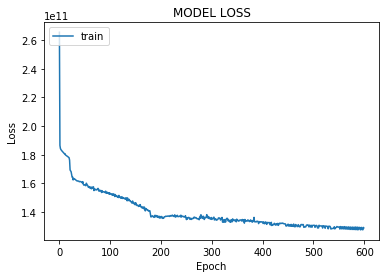

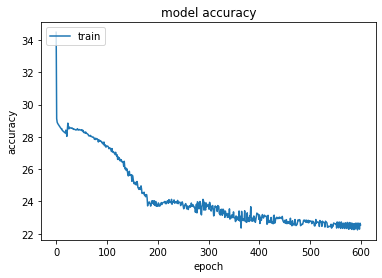

In [18]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(x_train)